# Exploratory Data Analysis (EDA)

### Retrieve data

In [ ]:
!pip install gdown

In [ ]:
!gdown "1KZTqa1PHu-FFtwE9PBBoF1jy-3_iUy2b"

Downloading...
From: https://drive.google.com/uc?id=1KZTqa1PHu-FFtwE9PBBoF1jy-3_iUy2b
To: /content/digit-recognizer.zip
100% 16.1M/16.1M [00:00<00:00, 71.1MB/s]


In [ ]:
!unzip "digit-recognizer.zip" && rm "digit-recognizer.zip"

Archive:  digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


### Import and preprocess data

In [ ]:
import pandas as pd

train_df = pd.read_csv("train.csv")
train_df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data = train_df.drop("label", axis = 1)
data_normalized = data / 255.0
data_normalized

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


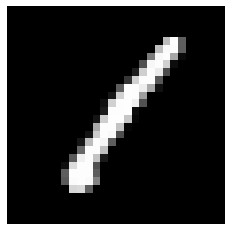

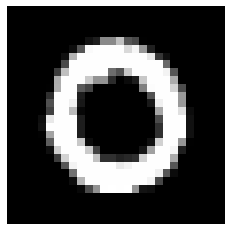

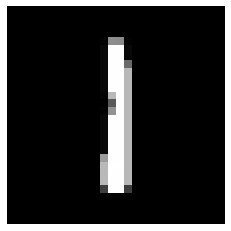

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

for i in range(3):
    image = data_normalized.iloc[[i]].squeeze()
    image_reshaped = np.reshape(image.to_numpy(), (28, 28))

    plt.imshow(image_reshaped, cmap = "gray")
    plt.axis("off")
    plt.show()

In [ ]:
!pip install pyspark

     |████████████████████████████████| 281.4 MB 28 kB/s 
     |████████████████████████████████| 198 kB 54.8 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=ba7b17614638f93ffe9cad492c3b894c39c60de66138847fd90b853d6d192db7
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .master("local") \
    .appName("Final Project") \
    .getOrCreate()

In [ ]:
data_df = spark.read.csv("train.csv", header = True, inferSchema = True)

(train_df, test_df) = data_df.randomSplit([.80, .20])

train_df.show()
print(train_df.count())

test_df.show()
print(test_df.count())

+-----+------+------+------+------+------+------+------+------+------+------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+-----

# Model Experiments

### Creating the model validators

In [ ]:
from pyspark.ml.feature import VectorAssembler

feature_assembler = VectorAssembler(inputCols = train_df.columns[1:], outputCol = "features")
train_assembler = feature_assembler.transform(train_df).select("label", "features")
test_assembler = feature_assembler.transform(test_df).select("label", "features")

train_assembler.show()
test_assembler.show()

+-----+--------------------+
|label|            features|
+-----+--------------------+
|    0|(784,[265,266,267...|
|    0|(784,[263,264,265...|
|    0|(784,[241,242,243...|
|    0|(784,[238,239,240...|
|    0|(784,[237,238,239...|
|    0|(784,[236,237,238...|
|    0|(784,[234,235,236...|
|    0|(784,[234,235,236...|
|    0|(784,[234,235,237...|
|    0|(784,[234,235,236...|
|    0|(784,[233,234,235...|
|    0|(784,[233,234,235...|
|    0|(784,[233,234,235...|
|    0|(784,[231,232,233...|
|    0|(784,[230,231,232...|
|    0|(784,[215,216,217...|
|    0|(784,[213,214,215...|
|    0|(784,[213,214,215...|
|    0|(784,[213,214,215...|
|    0|(784,[213,214,215...|
+-----+--------------------+
only showing top 20 rows

+-----+--------------------+
|label|            features|
+-----+--------------------+
|    0|(784,[260,261,262...|
|    0|(784,[236,237,238...|
|    0|(784,[236,237,238...|
|    0|(784,[216,217,218...|
|    0|(784,[214,215,216...|
|    0|(784,[212,213,214...|
|    0|(784,[210,

In [ ]:
from pyspark.ml.classification import MultilayerPerceptronClassifier

mlp_layer_counts = []
for i in range(9):
    mlp_layer_counts.append(MultilayerPerceptronClassifier(layers = [784, pow(2, i), 10], labelCol = "label", featuresCol = "features"))

mlp_num_hidden_layers = []
for i in range(5):
    mlp_num_hidden_layers.append(MultilayerPerceptronClassifier(layers = [784] + [10] * i + [10], labelCol = "label", featuresCol = "features"))

mlp_batch_sizes = []
for i in range(5):
    mlp_batch_sizes.append(MultilayerPerceptronClassifier(layers = [784, 16, 10], labelCol = "label", featuresCol = "features"))

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

evaluator = MulticlassClassificationEvaluator(labelCol = "label", predictionCol = "prediction", metricName = "accuracy")

In [ ]:
layer_counts = [[784, pow(2, i), 10] for i in range(9)]
num_hidden_layers = [[784] + [16] * i + [10] for i in range(5)]
num_folds = [pow(2, i) for i in range(6)]

In [ ]:
mlp_layer_counts = MultilayerPerceptronClassifier(layers = layer_counts[0], labelCol = "label", featuresCol = "features")
cv_layer_counts = CrossValidator(
    evaluator = evaluator,
    numFolds = 5,
    estimator = Pipeline(stages = [feature_assembler, mlp_layer_counts]),
    estimatorParamMaps = ParamGridBuilder().addGrid(mlp_layer_counts.layers, layer_counts).build()
)

cv_layer_counts_fitted = cv_layer_counts.fit(test_df)

for i in range(len(layer_counts)):
    print(f"Accuracy for {layer_counts[i][1]} nodes in a single hidden layer: {cv_layer_counts_fitted.avgMetrics[i]}")

In [ ]:
mlp_num_hidden_layers = MultilayerPerceptronClassifier(layers = num_hidden_layers[0], labelCol = "label", featuresCol = "features")
cv_num_hidden_layers = CrossValidator(
    evaluator = evaluator,
    numFolds = 5,
    estimator = Pipeline(stages = [feature_assembler, mlp_num_hidden_layers]),
    estimatorParamMaps = ParamGridBuilder().addGrid(mlp_num_hidden_layers.layers, num_hidden_layers).build()
)

cv_num_hidden_layers_fitted = cv_num_hidden_layers.fit(test_df)

for i in range(len(num_hidden_layers)):
    print(f"Accuracy for {len(num_hidden_layers[i]) - 2} hidden layers of 16 nodes each: {cv_num_hidden_layers_fitted.avgMetrics[i]}")

In [ ]:
mlp_num_folds = MultilayerPerceptronClassifier(layers = num_hidden_layers[0], labelCol = "label", featuresCol = "features")
cv_num_folds = []
for fold_count in num_folds:
    cv_num_folds.append(CrossValidator(
        evaluator = evaluator,
        numFolds = fold_count,
        estimator = Pipeline(stages = [feature_assembler, mlp_num_folds]),
        estimatorParamMaps = ParamGridBuilder().build()
    ))

for i in range(len(num_folds)):
    print(f"Accuracy for {num_folds[i]} folds: {cv_num_folds[i].avgMetrics[0]}")

# Results Analysis